In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("test.csv")

In [2]:
# df.head()
df.shape

(7900, 14)

<Axes: >

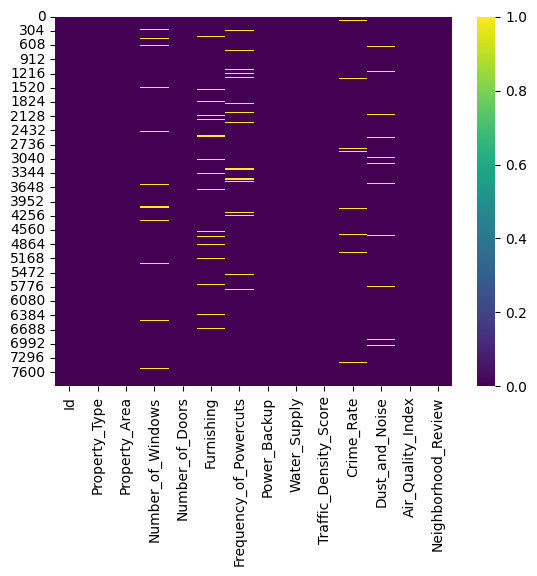

In [3]:
#to check the overview of the missing data used heat map to illustrate it 
sns.heatmap(df.isnull(),cmap="viridis",cbar="false")

In [4]:
#check how many null values are present in each column
df.isnull().sum()

Id                          0
Property_Type               0
Property_Area               0
Number_of_Windows         321
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts    274
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      7900 non-null   object 
 1   Property_Type           7900 non-null   object 
 2   Property_Area           7900 non-null   int64  
 3   Number_of_Windows       7579 non-null   float64
 4   Number_of_Doors         7900 non-null   int64  
 5   Furnishing              7686 non-null   object 
 6   Frequency_of_Powercuts  7626 non-null   float64
 7   Power_Backup            7900 non-null   object 
 8   Water_Supply            7900 non-null   object 
 9   Traffic_Density_Score   7900 non-null   float64
 10  Crime_Rate              7742 non-null   object 
 11  Dust_and_Noise          7680 non-null   object 
 12  Air_Quality_Index       7900 non-null   float64
 13  Neighborhood_Review     7900 non-null   float64
dtypes: float64(5), int64(2), object(7)
memor

In [6]:
#filling values for metric variable
df["Number_of_Windows"]=df["Number_of_Windows"].fillna(df["Number_of_Windows"].mean())
df["Frequency_of_Powercuts"]=df["Frequency_of_Powercuts"].fillna(df["Frequency_of_Powercuts"].mean())

In [7]:
#filling values for categorical variable
df["Furnishing"]=df["Furnishing"].fillna(df["Furnishing"].mode()[0])
df["Crime_Rate"]=df["Crime_Rate"].fillna(df["Crime_Rate"].mode()[0])
df["Dust_and_Noise"]=df["Dust_and_Noise"].fillna(df["Dust_and_Noise"].mode()[0])

In [8]:
#finding the unique values taken by each categorical variables
categ_variables=["Furnishing","Power_Backup","Water_Supply","Crime_Rate","Dust_and_Noise"]
for i in categ_variables:
    print(i,df[i].unique())

Furnishing ['Unfurnished' 'Semi_Furnished' 'Fully Furnished']
Power_Backup ['No' 'Yes' 'NOT MENTIONED']
Water_Supply ['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
Crime_Rate ['Well below average' 'Slightly below average' 'Slightly above average'
 'Well above average']
Dust_and_Noise ['Medium' 'Low' 'High']


In [9]:
#onehotencoding on the nominal variable
df_propertytype=pd.get_dummies(df["Property_Type"],prefix='Property_Type_').astype(int)

df=df.drop(["Property_Type"],axis=1)
df = pd.concat([df, df_propertytype], axis=1)  # Along columns

In [10]:
df.head(20)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x6808,1521,5.000000,1,Unfurnished,0.000000,No,All time,7.61,Well below average,Medium,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.000000,1,Semi_Furnished,0.000000,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.000000,1,Unfurnished,0.000000,No,All time,7.72,Well below average,Medium,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.000000,1,Semi_Furnished,0.000000,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.000000,2,Fully Furnished,0.000000,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56,0,0,0,0,0,1
5,0xbc8c,1883,5.000000,5,Fully Furnished,0.000000,No,All time,6.90,Well below average,Medium,151.0,4.72,0,0,1,0,0,0
6,0x610e,880,2.000000,2,Semi_Furnished,0.476659,Yes,All time,5.59,Slightly below average,Medium,97.0,3.54,0,1,0,0,0,0
7,0x62e8,350,3.000000,2,Unfurnished,0.000000,No,All time,7.34,Well below average,Medium,102.0,4.78,0,1,0,0,0,0
8,0x818e,661,1.000000,3,Unfurnished,1.000000,No,Once in a day - Morning,7.36,Well below average,Medium,90.0,3.85,0,1,0,0,0,0
9,0x6dc0,2147,5.000000,4,Semi_Furnished,0.000000,No,All time,6.96,Well below average,Medium,123.0,4.76,0,0,1,0,0,0


In [11]:
#ordinal encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

#furnishing category
oe_furnish=OrdinalEncoder(categories=[['Unfurnished' ,'Semi_Furnished','Fully Furnished']])
df["Furnishing"]=oe_furnish.fit_transform(df[["Furnishing"]])

#Power_Backup
df["Power_Backup"]=df["Power_Backup"].replace('NOT MENTIONED','No')
oe_powerbackup = OrdinalEncoder(categories=[['No','Yes']])
df["Power_Backup"]=oe_powerbackup.fit_transform(df[["Power_Backup"]])

#Water_Supply
df['Water_Supply'] = df['Water_Supply'].replace('Once in a day - Evening', 'Once in a day - Morning')
df['Water_Supply'] = df['Water_Supply'].replace('NOT MENTIONED','Once in two days')
oe_watersupply=OrdinalEncoder(categories=[["Once in two days",'Once in a day - Morning','All time']])
df["Water_Supply"] = oe_watersupply.fit_transform(df[["Water_Supply"]])

#Crime_Rate
oe_crime = OrdinalEncoder(categories=[['Well below average','Slightly below average','Slightly above average', 'Well above average']])
df["Crime_Rate"]=oe_crime.fit_transform(df[["Crime_Rate"]])

#Dust_and_Noise
oe_dustnoise = OrdinalEncoder(categories=[['Low','Medium','High']])
df["Dust_and_Noise"]=oe_dustnoise.fit_transform(df[["Dust_and_Noise"]])

In [12]:
df.head(20)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x6808,1521,5.000000,1,0.0,0.000000,0.0,2.0,7.61,0.0,1.0,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.000000,1,1.0,0.000000,0.0,1.0,5.28,0.0,1.0,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.000000,1,0.0,0.000000,0.0,2.0,7.72,0.0,1.0,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.000000,1,1.0,0.000000,0.0,1.0,6.19,0.0,1.0,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.000000,2,2.0,0.000000,0.0,1.0,5.84,1.0,1.0,82.0,3.56,0,0,0,0,0,1
5,0xbc8c,1883,5.000000,5,2.0,0.000000,0.0,2.0,6.90,0.0,1.0,151.0,4.72,0,0,1,0,0,0
6,0x610e,880,2.000000,2,1.0,0.476659,1.0,2.0,5.59,1.0,1.0,97.0,3.54,0,1,0,0,0,0
7,0x62e8,350,3.000000,2,0.0,0.000000,0.0,2.0,7.34,0.0,1.0,102.0,4.78,0,1,0,0,0,0
8,0x818e,661,1.000000,3,0.0,1.000000,0.0,1.0,7.36,0.0,1.0,90.0,3.85,0,1,0,0,0,0
9,0x6dc0,2147,5.000000,4,1.0,0.000000,0.0,2.0,6.96,0.0,1.0,123.0,4.76,0,0,1,0,0,0


In [13]:
df_id=df.pop("Id")
df_id

0       0x6808
1       0x6a98
2       0xacc0
3       0x8225
4       0xaee8
         ...  
7895    0x6e26
7896    0xa013
7897    0x9721
7898    0x7e25
7899    0x8cb4
Name: Id, Length: 7900, dtype: object

In [14]:
df.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,1521,5.0,1,0.0,0.0,0.0,2.0,7.61,0.0,1.0,156.0,4.71,0,0,0,0,0,1
1,2233,2.0,1,1.0,0.0,0.0,1.0,5.28,0.0,1.0,82.0,4.50,0,0,0,0,0,1
2,986,1.0,1,0.0,0.0,0.0,2.0,7.72,0.0,1.0,91.0,4.79,0,1,0,0,0,0
3,1625,2.0,1,1.0,0.0,0.0,1.0,6.19,0.0,1.0,159.0,4.09,0,0,0,0,0,1
4,1166,2.0,2,2.0,0.0,0.0,1.0,5.84,1.0,1.0,82.0,3.56,0,0,0,0,0,1


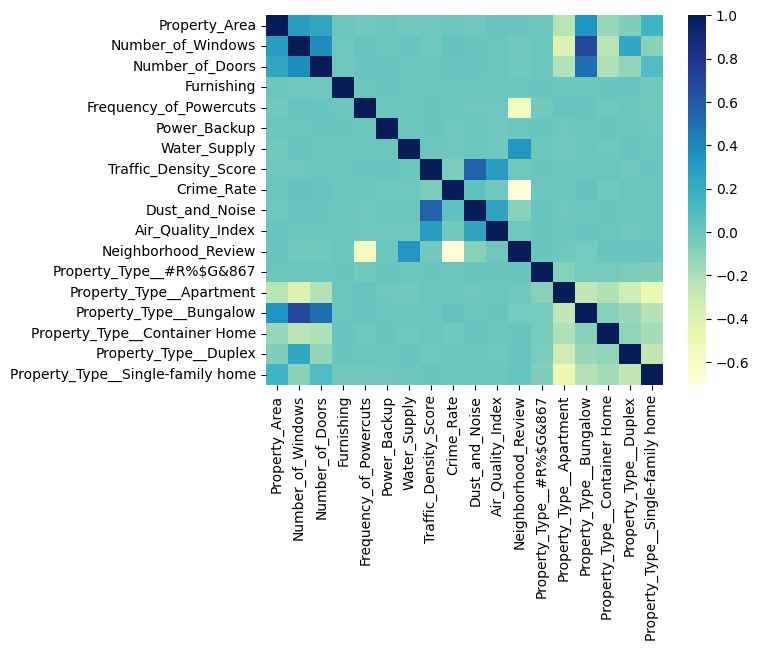

In [15]:
#to check any strong relationship between any attributes
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [16]:
df=pd.concat([df_id,df],axis="columns")

In [17]:
df.head(20)

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type__#R%$G&867,Property_Type__Apartment,Property_Type__Bungalow,Property_Type__Container Home,Property_Type__Duplex,Property_Type__Single-family home
0,0x6808,1521,5.000000,1,0.0,0.000000,0.0,2.0,7.61,0.0,1.0,156.0,4.71,0,0,0,0,0,1
1,0x6a98,2233,2.000000,1,1.0,0.000000,0.0,1.0,5.28,0.0,1.0,82.0,4.50,0,0,0,0,0,1
2,0xacc0,986,1.000000,1,0.0,0.000000,0.0,2.0,7.72,0.0,1.0,91.0,4.79,0,1,0,0,0,0
3,0x8225,1625,2.000000,1,1.0,0.000000,0.0,1.0,6.19,0.0,1.0,159.0,4.09,0,0,0,0,0,1
4,0xaee8,1166,2.000000,2,2.0,0.000000,0.0,1.0,5.84,1.0,1.0,82.0,3.56,0,0,0,0,0,1
5,0xbc8c,1883,5.000000,5,2.0,0.000000,0.0,2.0,6.90,0.0,1.0,151.0,4.72,0,0,1,0,0,0
6,0x610e,880,2.000000,2,1.0,0.476659,1.0,2.0,5.59,1.0,1.0,97.0,3.54,0,1,0,0,0,0
7,0x62e8,350,3.000000,2,0.0,0.000000,0.0,2.0,7.34,0.0,1.0,102.0,4.78,0,1,0,0,0,0
8,0x818e,661,1.000000,3,0.0,1.000000,0.0,1.0,7.36,0.0,1.0,90.0,3.85,0,1,0,0,0,0
9,0x6dc0,2147,5.000000,4,1.0,0.000000,0.0,2.0,6.96,0.0,1.0,123.0,4.76,0,0,1,0,0,0


In [18]:
df.to_csv('testdata_preprocessed.csv', index=False)